In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("/content/sample_data/california_housing_train.csv")
df_test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [3]:
df_train.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [4]:
df_test.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [5]:
df_x_train = df_train.drop(labels=["median_house_value"], axis=1)
df_y_train = df_train[["median_house_value"]]
df_x_test = df_test.drop(labels=["median_house_value"], axis=1)
df_y_test = df_test[["median_house_value"]]

print(df_x_train.shape, df_y_train.shape, df_x_test.shape, df_y_test.shape)

(17000, 8) (17000, 1) (3000, 8) (3000, 1)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_nrm = scaler.fit_transform(df_x_train)
x_test_nrm = scaler.transform(df_x_test)

In [7]:
print(x_test_nrm.std(0))

[0.99476155 0.99627452 0.99735719 0.98869255 0.98599727 0.8976773
 0.9502022  0.97175318]


In [8]:
y_train = df_y_train.values
y_test = df_y_test.values

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, 'linear'))

In [18]:
model.compile(optimizer='adam', loss="mae")

In [19]:
model.fit(x_train_nrm, y_train, epochs=32, validation_data=(x_test_nrm, y_test), batch_size=32)

Epoch 1/32
532/532 [==============================] - 3s 3ms/step - loss: 205799.8906 - val_loss: 199710.5938
Epoch 2/32
532/532 [==============================] - 1s 3ms/step - loss: 184934.5000 - val_loss: 160788.0781
Epoch 3/32
532/532 [==============================] - 2s 3ms/step - loss: 137923.4062 - val_loss: 114954.1094
Epoch 4/32
532/532 [==============================] - 1s 2ms/step - loss: 103704.8594 - val_loss: 92908.5859
Epoch 5/32
532/532 [==============================] - 2s 3ms/step - loss: 88169.6719 - val_loss: 81894.4609
Epoch 6/32
532/532 [==============================] - 1s 3ms/step - loss: 78387.9297 - val_loss: 73945.0703
Epoch 7/32
532/532 [==============================] - 1s 2ms/step - loss: 71228.0156 - val_loss: 67831.2812
Epoch 8/32
532/532 [==============================] - 3s 5ms/step - loss: 66040.4375 - val_loss: 63406.6914
Epoch 9/32
532/532 [==============================] - 2s 3ms/step - loss: 62345.2188 - val_loss: 60175.5586
Epoch 10/32
532/532 [

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1152      
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


In [23]:
yhat_test = model.predict(x_test_nrm)

94/94 [==============================] - 1s 6ms/step


In [22]:
import matplotlib.pyplot as plt

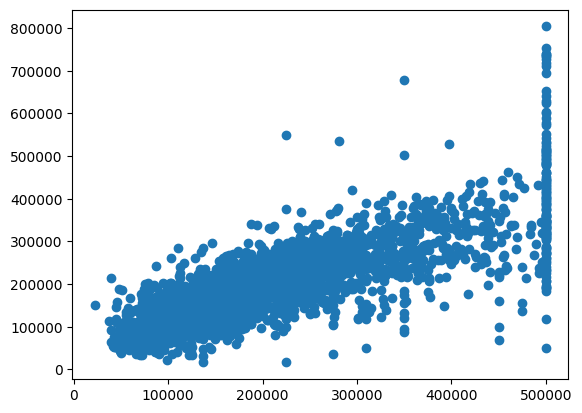

In [24]:
plt.scatter(y_test, yhat_test)